In [1]:
#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

In [3]:
#loading the dataset and converting it to a dataframe
leads = pd.read_csv('Leads.csv')

**Inspecting the dataframe**

In [4]:
#looking at the shape of the dataframe
leads.shape

(9240, 37)

In [5]:
#looking at the top 5 rows in the dataframe
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking conversion rate

conversion_rate = 100 * sum(leads['Converted'])/len(leads['Converted'])
conversion_rate

38.53896103896104

- A conversion rate of 38.5% means, approximately 39 people out of 100 leads successfully become a student.

In [8]:
#looking at the summary of numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**'Prospect ID' can be dropped since the values seem to be a mix of alpha numeric characters that are used for internal reference. It is not the target variable and using it in the analysis would make no sense.**

In [9]:
#dropping 'Prospect ID' column
leads = leads.drop('Prospect ID', axis=1)

In [10]:
#sanity check
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- 'Lead number' has values that are integers but since they are assigned to each lead, it should be an str since it should not be used for calculations.

In [11]:
#typecasting the 'Lead Number' column
leads['Lead Number'] = leads['Lead Number'].astype('str')

In [12]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**'Select' values:**

- The select values can be seen in a few columns but they can be considered as null since 'Select' is the default option when picking an option from a drop-down list. 
- If a value is 'Select' it means either the customer has forgotten to choose an option. 
- It is best to replace those values with NaN to avoid any confusions and thus determining the actual perecentage of null values in the dataset.

In [13]:
#replacing the values that are 'Select' with NaN
leads = leads.replace('Select',np.NaN)

In [14]:
# checking for null value percentages

round(100 * leads.isnull().sum()/len(leads),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- In the columns 'How did you hear about X Education' and 'Lead Profile', the null values are very high (greater than 70%).
- 'Lead Profile' is a manually generated column and including that in the model will create a bias.
- Imputing these values with the mode would generate an unwanted bias that would tamper with the analysis. 
- It would be best to drop these two columns.

In [15]:
#dropping the two columns
leads = leads.drop(['How did you hear about X Education','Lead Profile'], axis = 1)

- After this process, each column will be individually examined to determine whether it should be dropped or not, depending on its value. 
- If its not dropped necessary steps would be taken to impute the missing values.

### Taking care of null values

### Categorical Columns

In [16]:
# Checking "Lead Quality" column
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
leads['Lead Quality'].isnull().sum()

4767

- Instead of dropping the column, the null values can be imputed with 'Not Sure' as they are close in meaning.

In [18]:
leads['Lead Quality'] = leads['Lead Quality'].replace(np.NaN, 'Not Sure')

In [19]:
#looking at the value counts again
leads['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

- Next set of columns with the highest null values is the 
    - Assymetrique Activity Index
    - Assymetrique Profile Index
    - Assymetrique Activity Score
    - Assymetrique Profile Score

In [20]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

- The mode is '02.Medium', hence replacing the null values with the same would not create a huge bias for any other variable.

In [21]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

- The mode is again '02.Medium', hence replacing the null values with the same would not create a huge bias for any other variable.

In [22]:
#looking at the 'City' column
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- The mode of the column is 'Mumbai', so it makes sense to impute the missing values with the mode.

In [23]:
#looking at the 'Specialization' column
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

    - In a case like this column 'Specialization', one reason for null values could be that the lead's desired option might not be available in the given list. 
    - Hence, those values can be imputed with 'Others', instead of the mode.

In [24]:
leads['Specialization'] = leads['Specialization'].fillna('Others')

In [25]:
#sanity check
leads['Specialization'].isnull().sum()

0

In [26]:
leads['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
# taking a look 'Tags' column
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

- In this category, almost every possibitlity has been considered so, it makes sense to impute the missing values with the mode.

In [28]:
# looking at the next column with the highest null values
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- It makes sense to impute the missing values with the mode since the major chunk of data is already associated with 'Better Career Prospects'

In [29]:
#looking at the 'What is your current' occupation column
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- 'Other' is already in consideration, so the missing values can be replaced with the mode to aid the analysis.

In [30]:
#looking at the "Country" column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Belgium                    2
Italy                      2
Philippines                2
Uganda                     2
China                      2
Bangladesh                 2
Netherlands                2
Ghana                      2
Liberia                    1
Indonesia                  1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Switzerland                1
Tanzania      

- 'India' is the leading value i.e., the mode. Hence the missing values can be replaced with it. 

In [31]:
#filling null values in categorical columns with its 'mode' value

categ_cols = ['Asymmetrique Activity Index','Asymmetrique Profile Index','City','Tags',
              'What matters most to you in choosing a course','What is your current occupation','Country']

for i in categ_cols:
    leads[i] = leads[i].fillna(leads[i].mode()[0])

### Numerical columns

In [32]:
#looking at the 'Asymmetrique Activity Score' column
leads['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [33]:
#looking at the 'Asymmetrique Profile Score' column
leads['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [34]:
#looking at 'Page Views Per Visit' column
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [35]:
#looking at 'TotalVisits' column
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [36]:
#filling null values in numerical values with its 'mean' value

num_cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score','Page Views Per Visit','TotalVisits']

for i in num_cols:
    leads[i] = leads[i].fillna(leads[i].mean())

In [37]:
#checking for null value percentages again

round(100 * leads.isnull().sum()/len(leads),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

- There are 2 columns with less than 2% of null values, these rows can be dropped as it would not make a big impact on the analysis.

In [38]:
#dropping rows that have null values
leads = leads.dropna()

In [39]:
# perfoming a sanity check

round(100 * leads.isnull().sum()/len(leads),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [40]:
leads.shape

(9103, 34)

    - 137 rows were dropped and all the null values have gone, i.e., 1.48% of the datapoints from the original dataset have been dropped.
    - The dataset is devoid of null values and hence the analysis can proceed further.

### Outlier Analysis

In [41]:
#checking for outliers in the data by looking at the percentiles
leads.describe(percentiles=[0.01,.25,.5,.75,.90,.95,.97,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.379216,3.455994,483.773921,2.370128,14.310195,16.342345
std,0.485219,4.851055,545.519186,2.157425,1.027750,1.331952
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
1%,0.000000,0.000000,0.000000,0.000000,11.000000,13.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,16.000000
50%,0.000000,3.000000,247.000000,2.000000,14.306252,16.344883
75%,1.000000,5.000000,924.000000,3.000000,14.306252,16.344883
90%,1.000000,7.000000,1375.000000,5.000000,15.000000,18.000000
95%,1.000000,10.000000,1557.000000,6.000000,16.000000,19.000000


- In 2 columns namely, 'TotalVisits', 'Page Views Per Visit' there is a clear sign of outliers above 99th percentile. 
- Percentage of outliers above the 99th percentile can be calculated to see the effect it might have on the dataset.

**Calculating percentage of outliers**

In [42]:
#percentage of outliers in 'TotalVisits' column

100 * len(leads[leads['TotalVisits'] > 11])/len(leads)

2.9330989783587826

In [43]:
#percentage of outliers in 'Page Views Per Visit' column

100 * len(leads[leads['Page Views Per Visit'] > 9])/len(leads)

0.8239042074041525

### Performing EDA
    1. The target variable in the given dataset is 'Converted' which has already been mentioned in the problem statement.
    2. '1' would mean that the lead has been converted to a student. 
    3. '0' would mean that the lead has not been converted to a student.

In [44]:
# checking conversion rate

conversion_rate = 100 * sum(leads['Converted'])/len(leads['Converted'])
conversion_rate

37.92156431945512

- Conversion rate of approximately 38% is that out of every 100 leads, only 38 of them are successfully being converted to students at X Education.

### Performing Univariate and Bivariate Analysis

### Lead Origin

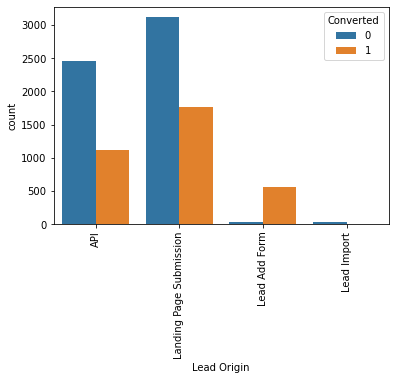

In [45]:
sns.countplot(x='Lead Origin', hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observations:**
- As seen above, API and Landing Page Submission have a decent conversion rate of about 30 to 35% but the point to be noted is that only those two have contriubuted to the maximum no. of leads.
- Lead Add Form has a high conversion rate but the contribution to number of leads is considerably low. 
- Lead Import has given very low number of leads.

### Lead Source

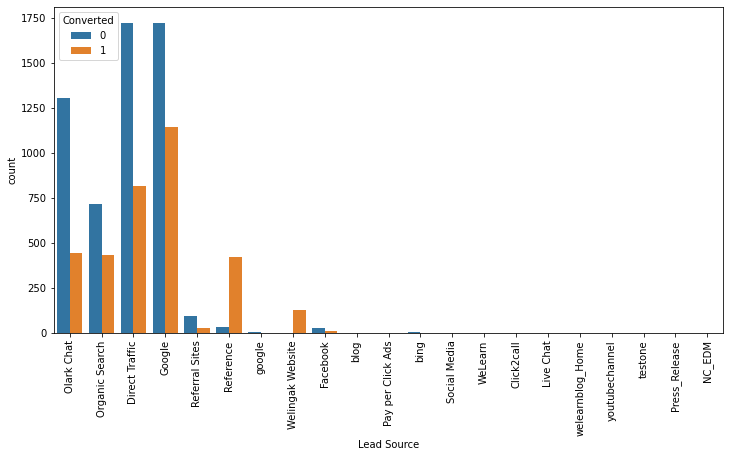

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lead Source', hue = 'Converted', data=leads)
plt.xticks(rotation=90);

**Observations:**
- As seen above 'Google' also appears as 'google', hence that should be taken care of. The reason could be a typing error. 
- 'Facebook' has been considered separately but it needs to be put under 'Social Media'.
- There are several other values such "Pay per click ads", "bing", "live chat", etc., that individually contribute very less to the number of leads. Hence they can be converted into a new category called "Others".

In [47]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

leads['Lead Source'] = leads['Lead Source'].replace([
    'blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call',
    'Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release',
    'NC_EDM'], 'Others')

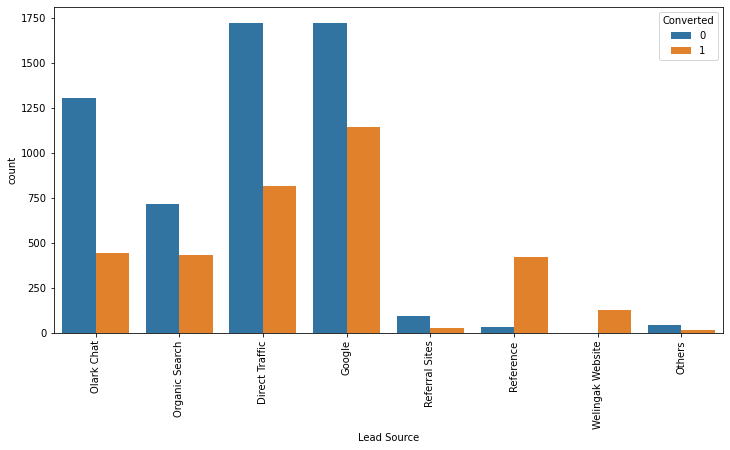

In [48]:
#looking at the countplot again
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lead Source', hue = 'Converted', data=leads)
plt.xticks(rotation=90);

**Observations:**
- The max number of leads are from Direct Traffic and Google, followed by Olark Chat and Organic Search. 
- Google has the highest conversion rate, followed by Direct Traffic.
- Conversion Rate for Reference and Welingak Website is very high but total no. of leads is significantly low.

### Do Not Email and Do Not Call

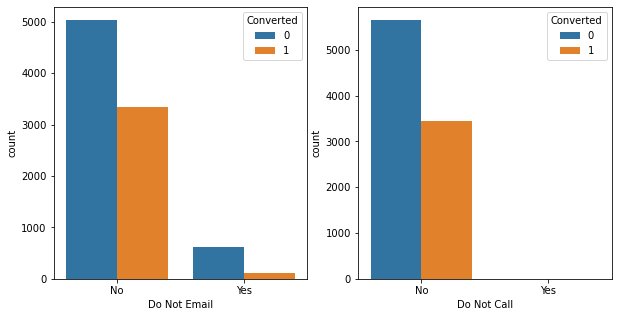

In [49]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Do Not Email',hue='Converted',data=leads, ax=ax[0])
sns.countplot(x='Do Not Call',hue='Converted',data=leads, ax=ax[1]);

#### Observation
- It can be clearly seen that leads who receive follow up emails and calls have a much higher chance of conversion compared to those who choose not to receive any emails or calls.
- There is a clear bias in 'Do Not Call' column, so removing the column would be better.

In [50]:
#adding the name of the column to be deteled to a list
cols_to_del = ['Do Not Call']
cols_to_del

['Do Not Call']

### Total Visits

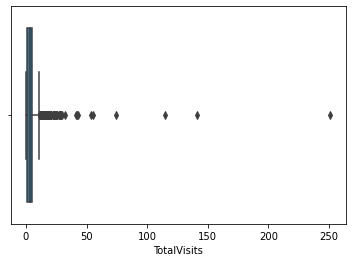

In [51]:
#plotting a boxplot
sns.boxplot(leads['TotalVisits']);

- As seen previously in the analysis of outliers, the no. of values above the 99th percentile is about 2.9%.
- Hence these values can be capped at that level.

In [52]:
percentiles = leads['TotalVisits'].quantile([0.01,0.97]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

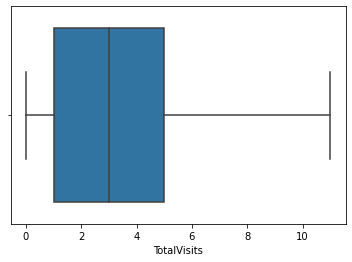

In [53]:
#plotting again
sns.boxplot(leads['TotalVisits']);

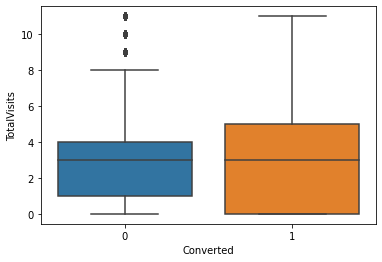

In [54]:
sns.boxplot(y='TotalVisits',x='Converted',data=leads);

**Observations:**
- The median value is more or less the same irrespective of whether the lead has converted or not. 
- The IQR range is higher for leads who have converted which means there is a considerable amount of variation.

### Total Time Spent on Website

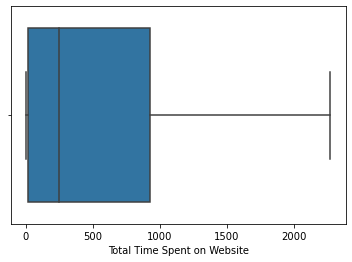

In [55]:
#plotting a boxplot
sns.boxplot(leads['Total Time Spent on Website']);

**Observations:**
- It looks like most of the leads (within the Inter Quartile Range) spend about a little over 0 to 1000 seconds on the website.

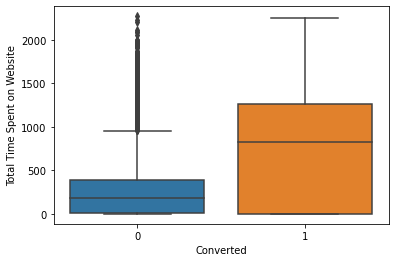

In [56]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=leads);

**Observations:**
- As expected, people who spend more time on the website are more likely to convert to a student.

### Page Views Per Visit

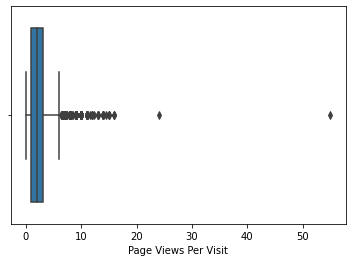

In [57]:
#plotting a boxplot
sns.boxplot(leads['Page Views Per Visit']);

- As it can be seen in the boxplot above, there are certain values above 20, that are outliers and introudcing them into the model would create bias. Hence, the values can be capped at 95th percentile.

In [58]:
precentiles = leads['Page Views Per Visit'].quantile([0.01, 0.99]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

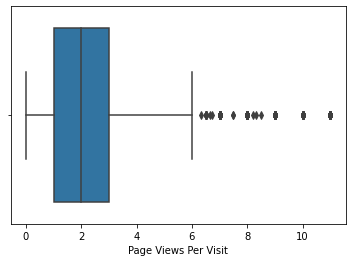

In [59]:
sns.boxplot(leads['Page Views Per Visit']);

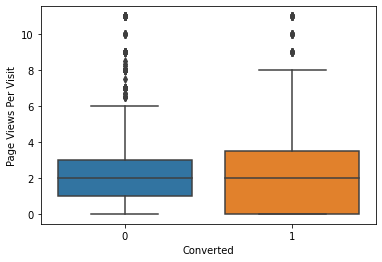

In [60]:
sns.boxplot(y='Page Views Per Visit', x='Converted', data=leads);

**Observation:**
- The mean value is similar in both cases. Hence, a significant conclusion cannot be made based on this plot.

### Last Activity

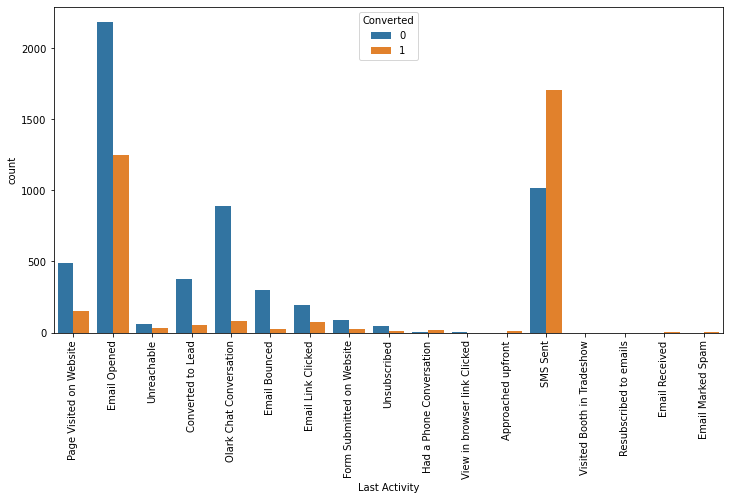

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.xticks(rotation=90);

- Since there are plenty of values here that do not contribute much to the overall count, they can be clubbed together and put into a new value called 'Others'.

In [62]:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                            'Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails',
                            'Email Received','Email Marked Spam'], 'Others')

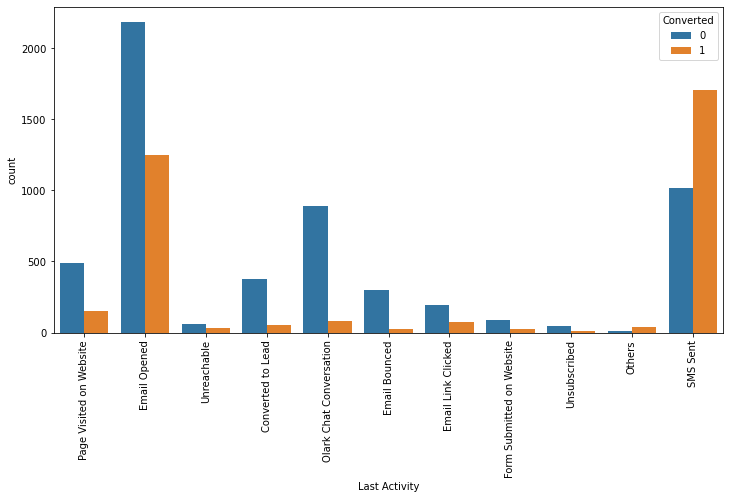

In [63]:
#looking at the plot again
plt.figure(figsize=(12,6))
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observations:**
- It can be seen that when an SMS is sent, the conversion rate is very high.
- Another point to be noted is that the last activity was 'Email Opened' in most cases.

### Country

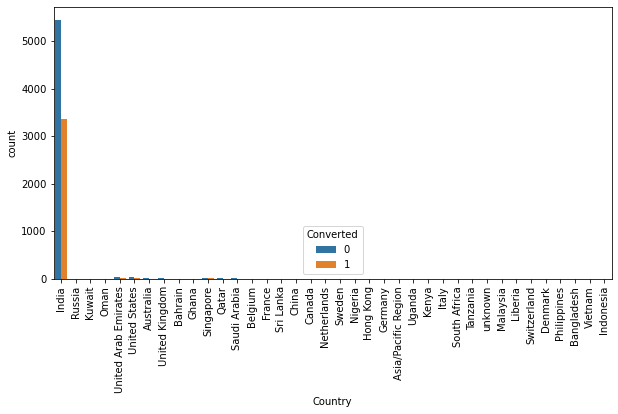

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='Country',hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observation:**
- Almost all the leads are from India, so there is not anything significant to infer from this plot.
- There is a clear bias in 'Country' column, so removing the column would be better.

In [65]:
#adding the name of the column to a list
cols_to_del.append('Country')
cols_to_del

['Do Not Call', 'Country']

### Specialization

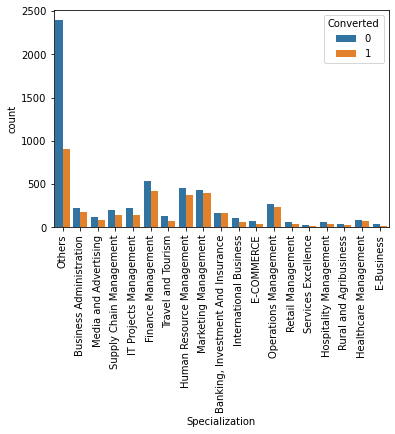

In [66]:
sns.countplot(x='Specialization',hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observation:**
- 'Others' here is those leads that didn't select their specialization on the wesbite. 
- Looking past that, the next few specializations to consider are 'Finance Management','Human Resource Management', 'Marketing Management' and 'Operations Management'.

### What is your current occupation

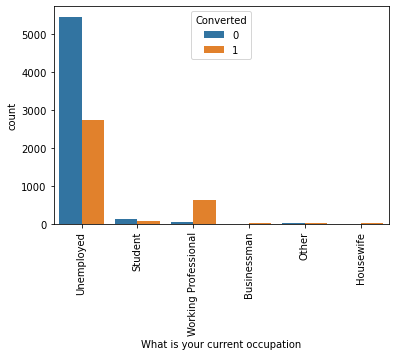

In [67]:
sns.countplot(x='What is your current occupation',hue='Converted',data=leads);
plt.xticks(rotation=90);

**Observation:**
- Unemployed people are the most number of leads.
- Working Professionals have a higher conversion rate than anyone else.

### What matters most to you in choosing a course

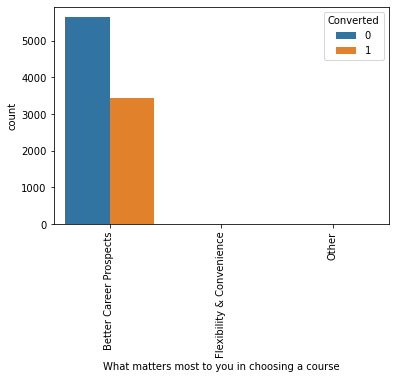

In [68]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observation:**
- There seems to be a clear answer why the lead chooses a course.
- There is a clear bias in this column, so removing the column would be better.

In [69]:
#adding the name of the column to a list
cols_to_del.append('What matters most to you in choosing a course')
cols_to_del

['Do Not Call', 'Country', 'What matters most to you in choosing a course']

### Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement

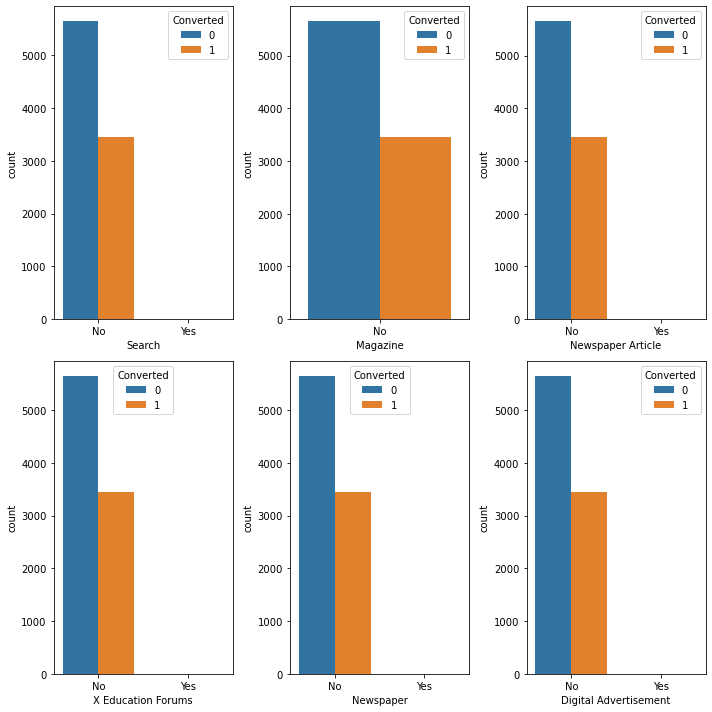

In [70]:
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
sns.countplot(x='Search',hue='Converted',data=leads)

plt.subplot(2,3,2)
sns.countplot(x='Magazine',hue='Converted',data=leads)

plt.subplot(2,3,3)
sns.countplot(x='Newspaper Article',hue='Converted',data=leads)

plt.subplot(2,3,4)
sns.countplot(x='X Education Forums',hue='Converted',data=leads)

plt.subplot(2,3,5)
sns.countplot(x='Newspaper',hue='Converted',data=leads)

plt.subplot(2,3,6)
sns.countplot(x='Digital Advertisement',hue='Converted',data=leads)

plt.tight_layout();

**Observations:**
- It can be seen that in 5 out of the 6 cases, there are extremely few customers who had seen the ads. 
- In the case of Magazines, there have been 0 customers where the ad was seen.
- It can be inferred that the advertisements do not have the desired reach to procure leads.
- It would be better to drop all these columns to avoid bias in the model.

In [71]:
##adding the names of the columns to a list
cols_to_del.extend(['Search', 
                   'Magazine', 
                   'Newspaper Article', 
                   'X Education Forums', 
                   'Newspaper', 
                   'Digital Advertisement'])
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

### Through Recommendations

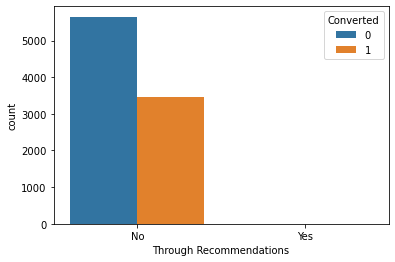

In [72]:
sns.countplot(x='Through Recommendations', hue='Converted', data=leads);

**Observation:**
- There have been almost few to no cases where the customer came in through a recommendation.
- To avoid bias in the model, this column can be removed since there is only a neglibile amount in 'Yes'.

In [73]:
##adding the names of the columns to a list
cols_to_del.append('Through Recommendations')
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

### Receive More Updates About Our Courses

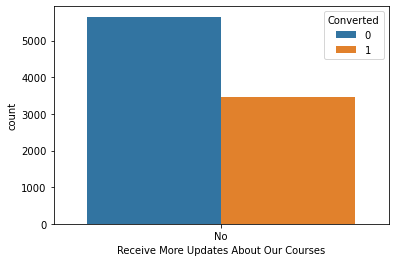

In [74]:
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted',data=leads);

**Observation:**
- None of the leads have agreed to receive updates about the courses.
- To avoid bias in the model, this column can be removed since there is only a neglibile amount in 'Yes'.

In [75]:
##adding the names of the columns to a list
cols_to_del.append('Receive More Updates About Our Courses')
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses']

### Tags

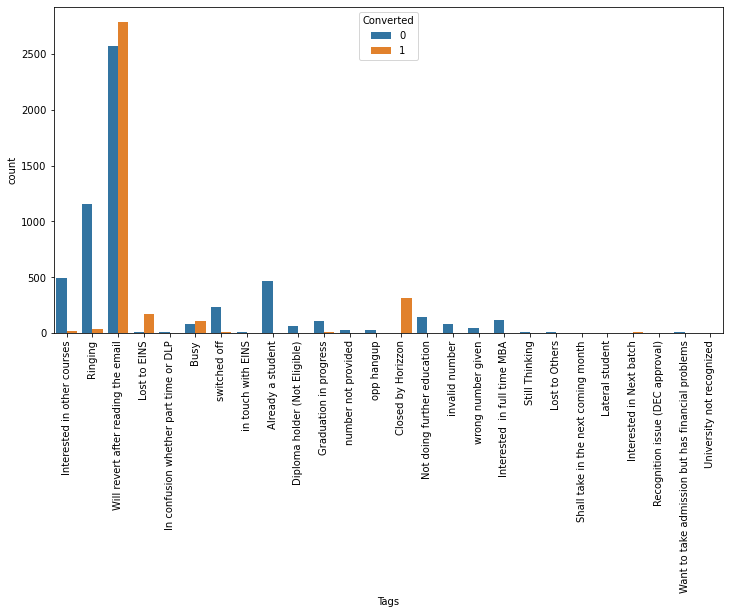

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x='Tags',hue='Converted',data=leads)
plt.xticks(rotation=90);

- As done before, a lot of the values that are almost negligible will be clubbed together and put under 'Others'

In [77]:
leads['Tags']=leads['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)',
                                'Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others',
                                'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                'University not recognized'], 'Others')

leads['Tags']=leads['Tags'].replace('wrong number given','invalid number')

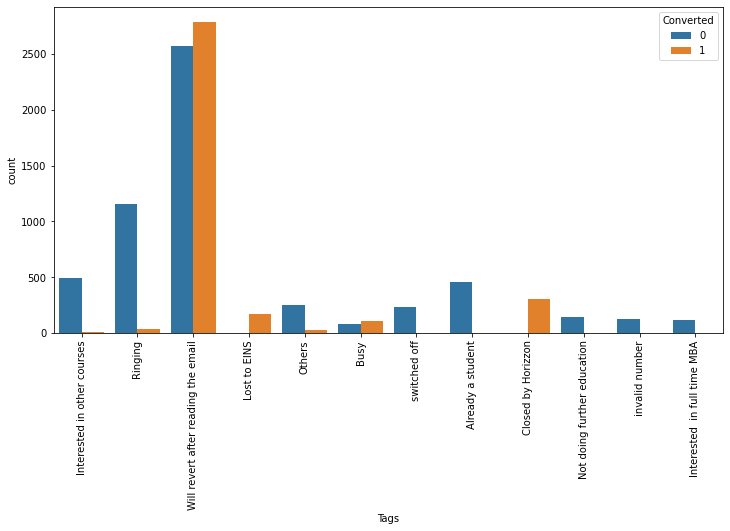

In [78]:
#plotting again
plt.figure(figsize=(12,6))
sns.countplot(x='Tags',hue='Converted',data=leads)
plt.xticks(rotation=90);

#### Observation:
- Customers who were tagged with 'Will revert after reading the email' have the highest contribution to the no. of leads and also have a good conversion rate.

### Lead Quality

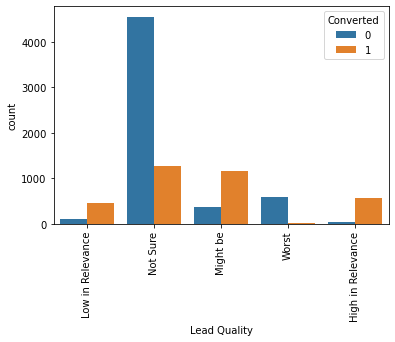

In [79]:
sns.countplot(x='Lead Quality', hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observation:**
- In most cases such as 'Low in Relevance', 'Might be' and 'High in Relevance', the conversion rate is high. 
- But the highest contribution to leads is under 'Not Sure'.

### Update me on Supply Chain Content

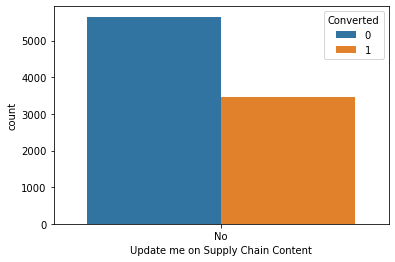

In [80]:
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=leads);

**Observation:**
- It can be seen that no customer has opted to be updated on Supply Chain content.
- All of them have chosen not to be updated on the Supply Chain content and among them, close to 35% have converted.
- There could be no causation between this and conversion.
- This column needs to be removed as there is no count for 'Yes'.

In [81]:
##adding the names of the columns to a list
cols_to_del.append('Update me on Supply Chain Content')
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content']

### Get updates on DM Content

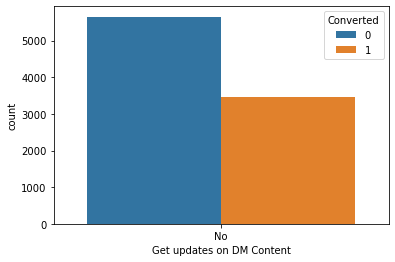

In [82]:
sns.countplot(x='Get updates on DM Content', hue='Converted', data=leads);

**Observation:**
- As seen before, no one has opted to be updated on DM content. 
- The conversion rate is same as before, around 35%. 
- There could be no causation between this and conversion.
- This column needs to be removed as there is no count for 'Yes'.

In [83]:
##adding the names of the columns to a list
cols_to_del.append('Get updates on DM Content')
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content']

### City

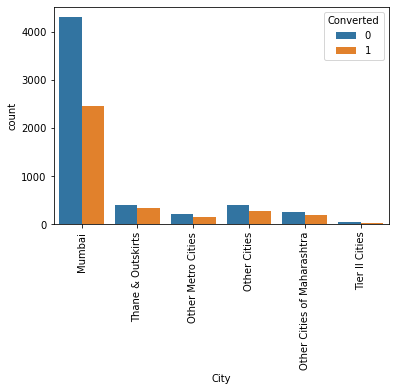

In [84]:
sns.countplot(x='City',hue='Converted',data=leads)
plt.xticks(rotation=90);

#### Observation:
- Mumbai has the highest no. of leads with around 7000 leads.
- This could be attributed to the location of X Education's office in Mumbai.

### Asymmetrique Activity Index, Asymmetrique Profile Index

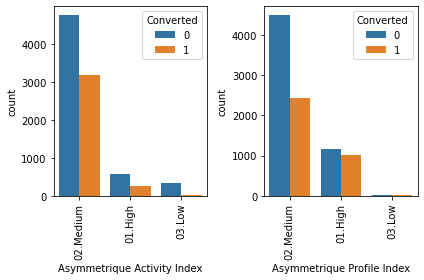

In [85]:
plt.subplot(1,2,1)
sns.countplot(x='Asymmetrique Activity Index', hue='Converted',data=leads)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Asymmetrique Profile Index', hue='Converted',data=leads)
plt.xticks(rotation=90)

plt.tight_layout()

**Observation:**
- In both cases, '02.Medium' is the top value.

### Asymmetrique Activity Score, Asymmetrique Profile Score

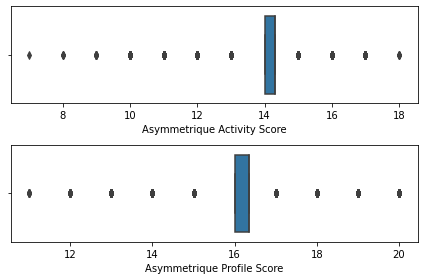

In [86]:
plt.subplot(2,1,1)
sns.boxplot(leads['Asymmetrique Activity Score'])

plt.subplot(2,1,2)
sns.boxplot(leads['Asymmetrique Profile Score'])

plt.tight_layout()

### I agree to pay the amount through cheque

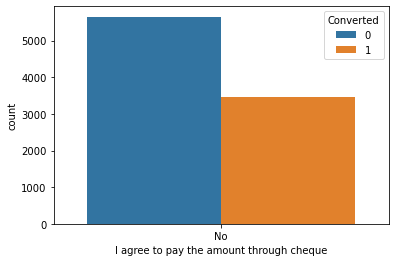

In [87]:
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=leads);

**Observation:**
- As seen in the plot, none of the customers have agreed to pay through cheque.
- Since only one of the two values are present, it is better to drop this column.

In [88]:
##adding the names of the columns to a list
cols_to_del.append('I agree to pay the amount through cheque')
cols_to_del

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

### A free copy of Mastering The Interview

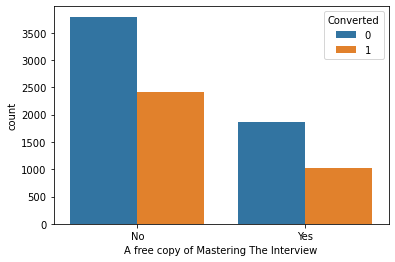

In [89]:
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=leads);

**Observation:**
- Most of the customers refused a free copy of the magazine.
- The conversion rate in either case is more or less the same.

### Last Notable Activity

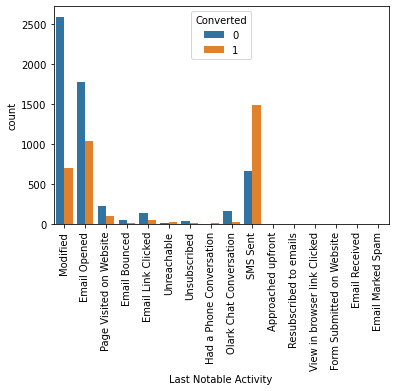

In [90]:
sns.countplot(x='Last Notable Activity',hue='Converted',data=leads)
plt.xticks(rotation=90);

**Observation:**
- Last Notable Acitivy has values more or less similar to 'Last Activity'. 
- Maybe one of the two columns can be dropped to avoid repetition.

### Inference:
   **Based on the analysis that was performed for each column against the target variable 'Converted', it was observed that several columns did not have an effect.**

   **In such a case, it would be best to drop unnecessary columns to make the analysis more effective.**

In [91]:
len(cols_to_del)

14

    - In addition to these columns, there are few columns that have been generated by the sales team which cannot be used in the model since they too would create an unwanted complexity in the model.
    
    - The goal is to build a model to predict the lead score based on the information collected from the website to help the sales team.
    
    - The columns created by sales team are:
        1. Tags
        2. Lead Quality
        3. Asymmetrique Activity Index
        4. Asymmetrique Profile Index
        5. Asymmetrique Activity Score
        6. Asymmetrique Profile Score
        7. Last Activity
        8. Last Notable Activity
        9. Lead Profile

In [92]:
#adding these columns to the existing list of columns to be deleted
cols_to_del.extend(['Tags',
                    'Lead Quality',
                    'Asymmetrique Activity Index',
                    'Asymmetrique Profile Index',
                    'Asymmetrique Activity Score',
                    'Asymmetrique Profile Score',
                    'Last Activity',
                    'Last Notable Activity'])
#'Lead Profile' was removed previously for having an extreme no. of null values

In [93]:
#looking at the no. of columns that needs to be removed
len(cols_to_del)

22

In [94]:
#removing the 22 columns
leads = leads.drop(cols_to_del,axis=1)

In [95]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Others,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5.0,674,2.5,Others,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No


In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   object 
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

### Looking at correlations in the dataset

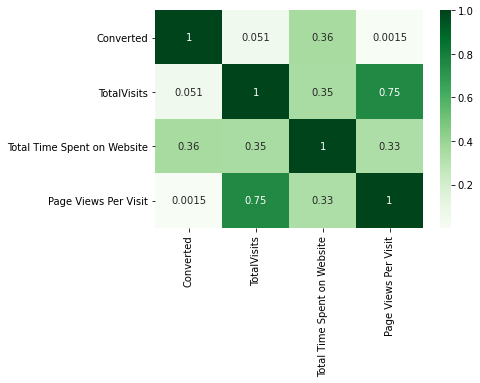

In [97]:
#plotting a heatmap to visualize the correlation
sns.heatmap(leads.corr(),annot=True,cmap='Greens');

**Observation:**
- 'Total Time Spent on Website' has the highest correlation with 'Converted'.

In [98]:
#checking for duplicates in the dataset
sum(leads.duplicated()==1)

0

**Since there are no duplicates and only the necessary columns are left, it can be said that the data is clean and can be taken to the next step for model building.**


**The next step is prepapring the data by creating dummy variables and changing 'Yes' and 'No' values to 1s and 0s.**

In [99]:
# converting 'yes' or 'no' values to '1' and '0' 
var_list = ['Do Not Email']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

leads[var_list] = leads[var_list].apply(binary_map)

In [100]:
#creating dummy variables for categorical columns

cat_cols = ['Lead Origin',
            'Lead Source',
            'Specialization',
            'What is your current occupation',
            'City',
            'A free copy of Mastering The Interview']

dummy = pd.get_dummies(leads[cat_cols], drop_first=True)

In [101]:
#looking at the dummy variables that were created
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
#concatenating the dummy variable dataframe to the original dataframe:

df = pd.concat([leads,dummy], axis=1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Mumbai,No,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Mumbai,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


- Now that the dummy variables have been created, the original columns can be dropped before proceeding to model building.

In [103]:
#dropping the original columns since dummy variables have been created now
df = df.drop(df[cat_cols],axis=1)

In [104]:
df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,660737,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,660719,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [105]:
df.shape

(9103, 45)

**Looking at correlations once again**

In [107]:
df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
Do Not Email,1.000000,-0.138682,0.003020,-0.044034,0.028402,0.097960,-0.027087,-0.012680,-0.071381,-0.051562,0.034964,-0.004504,-0.030751,-0.010139,0.002693,0.004276,0.012816,0.030423,-0.003008,0.011422,0.011891,-0.018817,0.070427,0.005587,-0.025894,0.000002,-0.013444,-0.041780,0.023726,0.028359,0.054316,0.003393,0.060755,-0.009227,-0.001886,0.007341,0.040397,-0.048017,0.012596,-0.004958,0.038864,-0.003325,0.045930,0.057036
Converted,-0.138682,1.000000,0.051453,0.360222,0.001504,-0.038807,0.303374,-0.015487,0.028018,-0.124845,-0.001099,-0.012419,0.258711,-0.031911,0.149570,0.028162,-0.001766,-0.006381,0.044769,0.029382,0.005997,0.048725,0.001391,-0.005724,0.066700,0.011372,0.044533,-0.161269,-0.008518,0.008421,-0.014270,0.019882,-0.008610,0.040250,0.018487,-0.006270,-0.280608,0.315414,0.012172,0.028569,0.012094,0.042333,-0.007721,-0.031706
TotalVisits,0.003020,0.051453,1.000000,0.353989,0.754584,0.442608,-0.265448,-0.051678,0.207765,-0.492276,0.300764,-0.039840,-0.229613,0.090609,-0.126308,0.069770,0.029928,0.040130,0.090022,0.052355,0.029690,0.089639,0.049443,0.060328,0.047355,0.071372,0.047573,-0.393758,0.045019,0.043298,0.028147,0.062904,0.099895,-0.008608,0.034399,-0.031764,0.010702,-0.000495,0.086387,0.062486,0.072362,0.097388,0.022916,0.292624
Total Time Spent on Website,-0.044034,0.360222,0.353989,1.000000,0.334717,0.289674,-0.179652,-0.042362,0.213739,-0.378493,0.100133,-0.035169,-0.152847,0.012315,-0.092051,0.055252,0.019790,-0.001193,0.075869,0.028622,0.036589,0.066207,0.034357,0.023442,0.067616,0.042879,0.061639,-0.294815,0.028551,0.021571,0.003413,0.050513,0.043040,0.006837,0.031312,-0.012644,-0.084381,0.096642,0.055030,0.068986,0.050592,0.077868,0.021745,0.175827
Page Views Per Visit,0.028402,0.001504,0.754584,0.334717,1.000000,0.509021,-0.278616,-0.052454,0.221382,-0.530382,0.318310,-0.038670,-0.240190,0.085819,-0.132371,0.060317,0.038889,0.048993,0.095805,0.043310,0.035917,0.088614,0.066556,0.073187,0.060350,0.069676,0.054087,-0.425165,0.045658,0.027906,0.022840,0.070158,0.118475,-0.008073,0.021321,-0.032815,0.018401,-0.006901,0.091104,0.086983,0.096820,0.094294,0.032571,0.286451
Lead Origin_Landing Page Submission,0.097960,-0.038807,0.442608,0.289674,0.509021,1.000000,-0.285870,-0.069677,0.081645,-0.525936,0.052124,-0.054297,-0.248839,-0.075871,-0.129027,0.132180,0.062591,0.079154,0.201427,0.059894,0.057074,0.157200,0.146451,0.094634,0.132684,0.101099,0.126029,-0.754257,0.076797,0.056379,0.048410,0.127102,0.111568,0.001194,0.005162,0.000671,0.003829,-0.003782,0.175202,0.150930,0.159180,0.153696,0.081670,0.565742
Lead Origin_Lead Add Form,-0.027087,0.303374,-0.265448,-0.179652,-0.278616,-0.285870

### Splitting the dataset into train and test data sets

In [108]:
#importing the necessary library
from sklearn.model_selection import train_test_split

In [109]:
X = df.drop(['Lead Number','Converted'],axis=1)

In [110]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [111]:
y = df.Converted

In [112]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [113]:
#Splitting the data into train and test sets

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

### Feature Scaling

- Out of the 12 original columns, two of the columns namely 'TotalVisits' and 'Total Time Spent on Website' are on a different scale. 
- This is not desirable since it may not truly reflect the relationships between variables.
- Hence, those 2 variables need to be standarzied before applying an ML model on it.

In [114]:
#importing the necessary library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
X_train[['TotalVisits',
         'Page Views Per Visit',
         'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                         'Page Views Per Visit',
                                                                         'Total Time Spent on Website']])

In [116]:
#performing a sanity check
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
7963,0,2.345409,2.486792,0.070346,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5521,1,1.307394,-0.836090,2.260663,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1951,0,-0.076626,1.828055,0.313715,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1553,0,0.269379,1.307999,-0.173022,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9170,0,-1.114640,-0.890832,-1.146497,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
#checking conversion rate
churn = (sum(df.Converted)/len(df.Converted))*100
churn

37.92156431945513

### Model Building

In [118]:
#importing the necessary library
import statsmodels.api as sm

In [119]:
#running the first model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.0
Date:                Mon, 17 May 2021   Deviance:                       5875.9
Time:                        17:56:43   Pearson chi2:                 7.70e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2657      1.097      0.242      0.809      -1.885       2.417
Do Not Email                                            -1.1455      0.156     -7.361      0.000      -1.451      -0.840
TotalVisits                                              0.2403      0.050      4.810      0.000       0.142       0.338
Total Time Spent on Website                              1.0922      0.038     28.532      0.000       1.017       1.167
Page Views Per Visit                                    -0.1266      0.053     -2.369      0.018      -0.231      -0.022
Lead Origin_Landing Page Submission                     -0.8267      0.128     -6.456      0.000      -1.078      -0.576
Lead Origin_Lead Add Form                                1.4890      1.072      1.389      0.165      -0.612       3.590
Lead Origin_Lead Import                                  0.3810      0.834      0.457      0.648      -1.253       2.015
Lead Source_Google                                       0.2381      0.108      2.206      0.027       0.027       0.450
Lead Source_Olark Chat                                   1.1005      0.150      7.330      0.000       0.806       1.395
Lead Source_Organic Search                               0.3036      0.121      2.500      0.012       0.066       0.542
Lead Source_Others                                       0.1585      0.679      0.233      0.815      -1.173       1.490
Lead Source_Reference                                    2.5473      1.094      2.328      0.020       0.403       4.691
Lead Source_Referral Sites                              -0.3580      0.350     -1.022      0.307      -1.045       0.329
Lead Source_Welingak Website                             5.6931      1.474      3.864      0.000       2.805       8.581
Specialization_Business Administration                  -0.1998      0.232     -0.860      0.390      -0.655       0.255
Specialization_E-Business                               -0.5206      0.447     -1.166      0.244      -1.396       0.355
Specialization_E-COMMERCE                               -0.1948      0.332     -0.587      0.557      -0.845       0.456
Specialization_Finance Management                       -0.1018      0.197     -0.516      0.606      -0.489       0.285
Specialization_Healthcare Management                    -0.1594      0.305     -0.522      0.601      -0.757       0.439
Specialization_Hospitality Management                   -1.0243      0.352     -2.908      0.004      -1.715      -0.334
Specialization_Human Resource Management                -0.3355      0.200     -1.678      0.093      -0.727       0.056
Specialization_IT Projects Management                    0

**/ Manual Feature selection would be a huge undertaking because of the high no. of variables present. Hence, RFE can be used to select the top 20 variables and then those can be manually evaluated. /**

### Feature selection using RFE

In [120]:
#importing necessary library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train,y_train)

In [122]:
rfe.support_

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False])

In [123]:
#looking at the list of the columns and their corresponding ranks as selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 14),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_Finance Management', False, 24),
 ('Specialization_Healthcare Management', False, 22),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 7),
 ('Specialization_IT Projects Management', False, 4),
 ('Specialization_International Business', False,

In [124]:
col = X_train.columns[rfe.support_]

In [125]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

In [126]:
#now we train the model with the top 20 columns as selected by the RFE
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2956.0
Date:                Mon, 17 May 2021   Deviance:                       5912.1
Time:                        17:56:45   Pearson chi2:                 7.60e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2053      1.101      0.186      0.852      -1.953       2.364
Do Not Email                                            -1.1529      0.154     -7.467      0.000      -1.456      -0.850
Total Time Spent on Website                              1.0951      0.038     28.836      0.000       1.021       1.169
Lead Origin_Landing Page Submission                     -0.8542      0.124     -6.863      0.000      -1.098      -0.610
Lead Origin_Lead Add Form                                1.4718      0.993      1.483      0.138      -0.474       3.417
Lead Origin_Lead Import                                  0.5602      0.495      1.131      0.258      -0.410       1.531
Lead Source_Google                                       0.3292      0.086      3.808      0.000       0.160       0.499
Lead Source_Olark Chat                                   1.0632      0.134      7.915      0.000       0.800       1.326
Lead Source_Organic Search                               0.4002      0.112      3.586      0.000       0.181       0.619
Lead Source_Reference                                    2.5068      1.012      2.476      0.013       0.522       4.491
Lead Source_Welingak Website                             5.6640      1.414      4.005      0.000       2.892       8.436
Specialization_E-Business                               -0.3714      0.416     -0.893      0.372      -1.187       0.444
Specialization_Hospitality Management                   -0.8681      0.310     -2.801      0.005      -1.475      -0.261
Specialization_Others                                   -1.2405      0.116    -10.736      0.000      -1.467      -1.014
Specialization_Retail Management                        -0.5057      0.304     -1.663      0.096      -1.102       0.090
Specialization_Travel and Tourism                       -0.4829      0.228     -2.115      0.034      -0.930      -0.035
What is your current occupation_Housewife               20.2833   1.13e+04      0.002      0.999   -2.21e+04    2.21e+04
What is your current occupation_Other                   -0.3366      1.255     -0.268      0.788      -2.795       2.122
What is your current occupation_Student                 -0.3447      1.118     -0.308      0.758      -2.535       1.846
What is your current occupation_Unemployed              -0.5250      1.098     -0.478      0.633      -2.677       1.627
What is your current occupation_Working Professional     2.0754      1.112      1.867      0.062      -0.104       4.255
========================================================================================================================
"""

**Checking VIFs**

In [127]:
#importing the necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,74.12
8,Lead Source_Reference,57.37
9,Lead Source_Welingak Website,17.28
18,What is your current occupation_Unemployed,16.65
2,Lead Origin_Landing Page Submission,7.95
12,Specialization_Others,4.52
6,Lead Source_Olark Chat,3.23
5,Lead Source_Google,2.37
19,What is your current occupation_Working Profes...,2.12
7,Lead Source_Organic Search,1.55


- 'What is your current occupation_Housewife' has a high P value of 0.999. It needs to be removed immediately.

In [129]:
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_E-Business', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [130]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.0
Date:                Mon, 17 May 2021   Deviance:                       5914.0
Time:                        17:56:45   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9959      0.917      1.086      0.277      -0.801       2.793
Do Not Email                                            -1.1530      0.154     -7.468      0.000      -1.456      -0.850
Total Time Spent on Website                              1.0954      0.038     28.839      0.000       1.021       1.170
Lead Origin_Landing Page Submission                     -0.8514      0.124     -6.846      0.000      -1.095      -0.608
Lead Origin_Lead Add Form                                1.4738      0.993      1.485      0.138      -0.471       3.419
Lead Origin_Lead Import                                  0.5617      0.495      1.135      0.257      -0.409       1.532
Lead Source_Google                                       0.3298      0.086      3.817      0.000       0.160       0.499
Lead Source_Olark Chat                                   1.0635      0.134      7.917      0.000       0.800       1.327
Lead Source_Organic Search                               0.3988      0.112      3.574      0.000       0.180       0.617
Lead Source_Reference                                    2.5070      1.012      2.476      0.013       0.523       4.491
Lead Source_Welingak Website                             5.6631      1.414      4.004      0.000       2.891       8.435
Specialization_E-Business                               -0.3720      0.416     -0.894      0.371      -1.187       0.444
Specialization_Hospitality Management                   -0.8682      0.310     -2.802      0.005      -1.476      -0.261
Specialization_Others                                   -1.2389      0.115    -10.731      0.000      -1.465      -1.013
Specialization_Retail Management                        -0.5061      0.304     -1.664      0.096      -1.102       0.090
Specialization_Travel and Tourism                       -0.4826      0.228     -2.114      0.035      -0.930      -0.035
What is your current occupation_Other                   -1.1292      1.094     -1.032      0.302      -3.274       1.016
What is your current occupation_Student                 -1.1376      0.934     -1.218      0.223      -2.968       0.693
What is your current occupation_Unemployed              -1.3179      0.910     -1.448      0.148      -3.102       0.466
What is your current occupation_Working Professional     1.2825      0.927      1.383      0.167      -0.535       3.100
========================================================================================================================
"""

**Checking VIFs**

In [131]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,74.11
8,Lead Source_Reference,57.37
9,Lead Source_Welingak Website,17.28
17,What is your current occupation_Unemployed,16.50
2,Lead Origin_Landing Page Submission,7.89
12,Specialization_Others,4.51
6,Lead Source_Olark Chat,3.21
5,Lead Source_Google,2.37
18,What is your current occupation_Working Profes...,2.11
7,Lead Source_Organic Search,1.55


- 'Specialization_E-Business' has a high p-value, hence it needs to be removed

In [132]:
col = col.drop('Specialization_E-Business',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [133]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2957.4
Date:                Mon, 17 May 2021   Deviance:                       5914.9
Time:                        17:56:45   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9953      0.917      1.086      0.278      -0.802       2.792
Do Not Email                                            -1.1529      0.154     -7.469      0.000      -1.455      -0.850
Total Time Spent on Website                              1.0952      0.038     28.839      0.000       1.021       1.170
Lead Origin_Landing Page Submission                     -0.8532      0.124     -6.862      0.000      -1.097      -0.609
Lead Origin_Lead Add Form                                1.4762      0.992      1.488      0.137      -0.469       3.421
Lead Origin_Lead Import                                  0.5640      0.495      1.139      0.255      -0.406       1.534
Lead Source_Google                                       0.3318      0.086      3.842      0.000       0.163       0.501
Lead Source_Olark Chat                                   1.0654      0.134      7.931      0.000       0.802       1.329
Lead Source_Organic Search                               0.4006      0.112      3.591      0.000       0.182       0.619
Lead Source_Reference                                    2.5055      1.012      2.475      0.013       0.521       4.490
Lead Source_Welingak Website                             5.6623      1.414      4.004      0.000       2.891       8.434
Specialization_Hospitality Management                   -0.8648      0.310     -2.790      0.005      -1.472      -0.257
Specialization_Others                                   -1.2370      0.115    -10.717      0.000      -1.463      -1.011
Specialization_Retail Management                        -0.5023      0.304     -1.652      0.099      -1.098       0.094
Specialization_Travel and Tourism                       -0.4787      0.228     -2.097      0.036      -0.926      -0.031
What is your current occupation_Other                   -1.1284      1.094     -1.031      0.303      -3.274       1.017
What is your current occupation_Student                 -1.1424      0.934     -1.223      0.221      -2.973       0.688
What is your current occupation_Unemployed              -1.3211      0.910     -1.451      0.147      -3.105       0.463
What is your current occupation_Working Professional     1.2826      0.927      1.383      0.167      -0.535       3.100
========================================================================================================================
"""

**Checking VIFs**

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,74.11
8,Lead Source_Reference,57.37
9,Lead Source_Welingak Website,17.28
16,What is your current occupation_Unemployed,16.49
2,Lead Origin_Landing Page Submission,7.89
11,Specialization_Others,4.51
6,Lead Source_Olark Chat,3.21
5,Lead Source_Google,2.37
17,What is your current occupation_Working Profes...,2.11
7,Lead Source_Organic Search,1.55


- 'What is your current occupation_Other' has a high p-value, hence it needs to be removed

In [135]:
col = col.drop('What is your current occupation_Other',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [136]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.0
Date:                Mon, 17 May 2021   Deviance:                       5916.0
Time:                        17:56:45   Pearson chi2:                 7.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2486      0.512      0.486      0.627      -0.755       1.252
Do Not Email                                            -1.1550      0.154     -7.477      0.000      -1.458      -0.852
Total Time Spent on Website                              1.0946      0.038     28.837      0.000       1.020       1.169
Lead Origin_Landing Page Submission                     -0.8529      0.124     -6.857      0.000      -1.097      -0.609
Lead Origin_Lead Add Form                                1.4763      0.992      1.488      0.137      -0.469       3.421
Lead Origin_Lead Import                                  0.5645      0.495      1.140      0.254      -0.406       1.535
Lead Source_Google                                       0.3329      0.086      3.854      0.000       0.164       0.502
Lead Source_Olark Chat                                   1.0662      0.134      7.937      0.000       0.803       1.329
Lead Source_Organic Search                               0.4022      0.112      3.607      0.000       0.184       0.621
Lead Source_Reference                                    2.5084      1.012      2.478      0.013       0.524       4.493
Lead Source_Welingak Website                             5.6631      1.414      4.005      0.000       2.891       8.435
Specialization_Hospitality Management                   -0.8647      0.310     -2.790      0.005      -1.472      -0.257
Specialization_Others                                   -1.2371      0.115    -10.713      0.000      -1.463      -1.011
Specialization_Retail Management                        -0.5020      0.304     -1.651      0.099      -1.098       0.094
Specialization_Travel and Tourism                       -0.4787      0.228     -2.097      0.036      -0.926      -0.031
What is your current occupation_Student                 -0.3964      0.544     -0.729      0.466      -1.462       0.669
What is your current occupation_Unemployed              -0.5751      0.502     -1.146      0.252      -1.559       0.409
What is your current occupation_Working Professional     2.0285      0.532      3.814      0.000       0.986       3.071
========================================================================================================================
"""

**Checking VIFs**

In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,74.10
8,Lead Source_Reference,57.37
9,Lead Source_Welingak Website,17.28
15,What is your current occupation_Unemployed,16.18
2,Lead Origin_Landing Page Submission,7.76
11,Specialization_Others,4.48
6,Lead Source_Olark Chat,3.18
5,Lead Source_Google,2.35
16,What is your current occupation_Working Profes...,2.08
7,Lead Source_Organic Search,1.54


- 'What is your current occupation_Student' has a high p-value, hence it needs to be removed

In [138]:
col = col.drop('What is your current occupation_Student',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [139]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.3
Date:                Mon, 17 May 2021   Deviance:                       5916.5
Time:                        17:56:45   Pearson chi2:                 7.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0823      0.232     -0.355      0.723      -0.537       0.372
Do Not Email                                            -1.1547      0.154     -7.480      0.000      -1.457      -0.852
Total Time Spent on Website                              1.0953      0.038     28.861      0.000       1.021       1.170
Lead Origin_Landing Page Submission                     -0.8571      0.124     -6.900      0.000      -1.101      -0.614
Lead Origin_Lead Add Form                                1.4733      0.993      1.484      0.138      -0.472       3.419
Lead Origin_Lead Import                                  0.5629      0.495      1.137      0.256      -0.408       1.533
Lead Source_Google                                       0.3317      0.086      3.841      0.000       0.162       0.501
Lead Source_Olark Chat                                   1.0646      0.134      7.927      0.000       0.801       1.328
Lead Source_Organic Search                               0.4027      0.112      3.612      0.000       0.184       0.621
Lead Source_Reference                                    2.5107      1.013      2.479      0.013       0.526       4.495
Lead Source_Welingak Website                             5.6659      1.414      4.006      0.000       2.894       8.438
Specialization_Hospitality Management                   -0.8684      0.310     -2.803      0.005      -1.476      -0.261
Specialization_Others                                   -1.2419      0.115    -10.770      0.000      -1.468      -1.016
Specialization_Retail Management                        -0.5030      0.304     -1.654      0.098      -1.099       0.093
Specialization_Travel and Tourism                       -0.4824      0.228     -2.113      0.035      -0.930      -0.035
What is your current occupation_Unemployed              -0.2394      0.195     -1.226      0.220      -0.622       0.143
What is your current occupation_Working Professional     2.3639      0.264      8.970      0.000       1.847       2.880
========================================================================================================================
"""

**Checking VIFs**

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,73.90
8,Lead Source_Reference,57.37
9,Lead Source_Welingak Website,17.27
14,What is your current occupation_Unemployed,11.82
2,Lead Origin_Landing Page Submission,5.86
11,Specialization_Others,3.84
6,Lead Source_Olark Chat,2.86
5,Lead Source_Google,2.20
15,What is your current occupation_Working Profes...,1.81
7,Lead Source_Organic Search,1.49


- 'Lead Origin_Lead Import'	has a p-value higher than 0.05. Hence it needs to be removed.

In [141]:
col = col.drop('Lead Origin_Lead Import',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [142]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2958.9
Date:                Mon, 17 May 2021   Deviance:                       5917.7
Time:                        17:56:46   Pearson chi2:                 7.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0575      0.231     -0.249      0.803      -0.510       0.395
Do Not Email                                            -1.1568      0.154     -7.497      0.000      -1.459      -0.854
Total Time Spent on Website                              1.0925      0.038     28.874      0.000       1.018       1.167
Lead Origin_Landing Page Submission                     -0.8766      0.123     -7.121      0.000      -1.118      -0.635
Lead Origin_Lead Add Form                                1.4522      0.992      1.464      0.143      -0.492       3.396
Lead Source_Google                                       0.3191      0.086      3.730      0.000       0.151       0.487
Lead Source_Olark Chat                                   1.0396      0.132      7.859      0.000       0.780       1.299
Lead Source_Organic Search                               0.3900      0.111      3.518      0.000       0.173       0.607
Lead Source_Reference                                    2.5056      1.012      2.476      0.013       0.522       4.489
Lead Source_Welingak Website                             5.6631      1.414      4.005      0.000       2.892       8.434
Specialization_Hospitality Management                   -0.8683      0.310     -2.802      0.005      -1.476      -0.261
Specialization_Others                                   -1.2477      0.115    -10.817      0.000      -1.474      -1.022
Specialization_Retail Management                        -0.5035      0.304     -1.656      0.098      -1.099       0.092
Specialization_Travel and Tourism                       -0.4813      0.228     -2.108      0.035      -0.929      -0.034
What is your current occupation_Unemployed              -0.2365      0.195     -1.212      0.226      -0.619       0.146
What is your current occupation_Working Professional     2.3684      0.263      8.990      0.000       1.852       2.885
========================================================================================================================
"""

**Checking VIFs**

In [143]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,73.89
7,Lead Source_Reference,57.36
8,Lead Source_Welingak Website,17.27
13,What is your current occupation_Unemployed,11.54
2,Lead Origin_Landing Page Submission,5.79
10,Specialization_Others,3.84
5,Lead Source_Olark Chat,2.79
4,Lead Source_Google,2.17
14,What is your current occupation_Working Profes...,1.78
6,Lead Source_Organic Search,1.48


- 'What is your current occupation_Unemployed' has a p-value greater than 0.05 as well as a high VIF. So it needs to be removed. 

In [144]:
col = col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [145]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.6
Date:                Mon, 17 May 2021   Deviance:                       5919.2
Time:                        17:56:46   Pearson chi2:                 7.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2833      0.136     -2.085      0.037      -0.550      -0.017
Do Not Email                                            -1.1575      0.154     -7.501      0.000      -1.460      -0.855
Total Time Spent on Website                              1.0930      0.038     28.886      0.000       1.019       1.167
Lead Origin_Landing Page Submission                     -0.8794      0.123     -7.146      0.000      -1.121      -0.638
Lead Origin_Lead Add Form                                1.4429      0.992      1.454      0.146      -0.502       3.388
Lead Source_Google                                       0.3161      0.085      3.698      0.000       0.149       0.484
Lead Source_Olark Chat                                   1.0411      0.132      7.872      0.000       0.782       1.300
Lead Source_Organic Search                               0.3867      0.111      3.491      0.000       0.170       0.604
Lead Source_Reference                                    2.5148      1.012      2.484      0.013       0.531       4.499
Lead Source_Welingak Website                             5.6678      1.414      4.008      0.000       2.896       8.440
Specialization_Hospitality Management                   -0.8661      0.310     -2.792      0.005      -1.474      -0.258
Specialization_Others                                   -1.2511      0.115    -10.844      0.000      -1.477      -1.025
Specialization_Retail Management                        -0.5099      0.304     -1.677      0.094      -1.106       0.086
Specialization_Travel and Tourism                       -0.4784      0.228     -2.097      0.036      -0.926      -0.031
What is your current occupation_Working Professional     2.5980      0.183     14.172      0.000       2.239       2.957
========================================================================================================================
"""

**Checking VIFs**

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,73.36
7,Lead Source_Reference,57.36
8,Lead Source_Welingak Website,17.26
10,Specialization_Others,2.51
5,Lead Source_Olark Chat,2.12
4,Lead Source_Google,1.74
2,Lead Origin_Landing Page Submission,1.72
6,Lead Source_Organic Search,1.32
1,Total Time Spent on Website,1.29
13,What is your current occupation_Working Profes...,1.18


- 'Lead Origin_Lead Add Form' has a high VIF value as well as a high VIF, hence it should be dropped.

In [147]:
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management', 'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [148]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2960.7
Date:                Mon, 17 May 2021   Deviance:                       5921.4
Time:                        17:56:46   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2608      0.135     -1.931      0.053      -0.525       0.004
Do Not Email                                            -1.1587      0.154     -7.509      0.000      -1.461      -0.856
Total Time Spent on Website                              1.0917      0.038     28.868      0.000       1.018       1.166
Lead Origin_Landing Page Submission                     -0.8980      0.122     -7.332      0.000      -1.138      -0.658
Lead Source_Google                                       0.3111      0.085      3.644      0.000       0.144       0.478
Lead Source_Olark Chat                                   1.0311      0.132      7.812      0.000       0.772       1.290
Lead Source_Organic Search                               0.3808      0.111      3.441      0.001       0.164       0.598
Lead Source_Reference                                    3.9432      0.244     16.185      0.000       3.466       4.421
Lead Source_Welingak Website                             7.1012      1.014      7.000      0.000       5.113       9.089
Specialization_Hospitality Management                   -0.8680      0.310     -2.798      0.005      -1.476      -0.260
Specialization_Others                                   -1.2653      0.115    -10.995      0.000      -1.491      -1.040
Specialization_Retail Management                        -0.5115      0.304     -1.682      0.093      -1.108       0.084
Specialization_Travel and Tourism                       -0.4790      0.228     -2.099      0.036      -0.926      -0.032
What is your current occupation_Working Professional     2.5947      0.183     14.150      0.000       2.235       2.954
========================================================================================================================
"""

**Checking VIFs**

In [149]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Specialization_Others,2.51
4,Lead Source_Olark Chat,2.12
3,Lead Source_Google,1.74
2,Lead Origin_Landing Page Submission,1.72
5,Lead Source_Organic Search,1.32
1,Total Time Spent on Website,1.29
6,Lead Source_Reference,1.18
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
7,Lead Source_Welingak Website,1.09


- 'Specialization_Retail Management' has a high p-value and hence it needs to be removed.

In [150]:
col = col.drop('Specialization_Retail Management',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [151]:
#rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.2
Date:                Mon, 17 May 2021   Deviance:                       5924.3
Time:                        17:56:46   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2670      0.135     -1.979      0.048      -0.532      -0.003
Do Not Email                                            -1.1599      0.154     -7.517      0.000      -1.462      -0.857
Total Time Spent on Website                              1.0904      0.038     28.853      0.000       1.016       1.164
Lead Origin_Landing Page Submission                     -0.9000      0.122     -7.348      0.000      -1.140      -0.660
Lead Source_Google                                       0.3089      0.085      3.621      0.000       0.142       0.476
Lead Source_Olark Chat                                   1.0281      0.132      7.791      0.000       0.769       1.287
Lead Source_Organic Search                               0.3791      0.111      3.428      0.001       0.162       0.596
Lead Source_Reference                                    3.9411      0.244     16.179      0.000       3.464       4.419
Lead Source_Welingak Website                             7.0984      1.014      6.997      0.000       5.110       9.087
Specialization_Hospitality Management                   -0.8572      0.310     -2.764      0.006      -1.465      -0.249
Specialization_Others                                   -1.2569      0.115    -10.931      0.000      -1.482      -1.032
Specialization_Travel and Tourism                       -0.4687      0.228     -2.055      0.040      -0.916      -0.022
What is your current occupation_Working Professional     2.5902      0.183     14.139      0.000       2.231       2.949
========================================================================================================================
"""

**Checking VIFs**

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Specialization_Others,2.51
4,Lead Source_Olark Chat,2.12
3,Lead Source_Google,1.74
2,Lead Origin_Landing Page Submission,1.71
5,Lead Source_Organic Search,1.32
1,Total Time Spent on Website,1.29
6,Lead Source_Reference,1.18
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
7,Lead Source_Welingak Website,1.09


**All P-values are less than 0.05 and the VIF values too are in the acceptable range.**

In [153]:
# getting the pred values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.98424704, 0.03773859, 0.88444347, 0.63834305, 0.18737459,
       0.18737459, 0.63651755, 0.68659982, 0.11722598, 0.18247749])

**Creating a dataframe with the actual Converted flag and predicted probabilities**

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final['Serial No.']=y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Serial No.
0,1,0.984247,7963
1,0,0.037739,5521
2,1,0.884443,1951
3,1,0.638343,1553
4,0,0.187375,9170


**Creating a new column 'Predicted' with 1 if Churn > 0.5 else 0.**

In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Serial No.,Predicted
0,1,0.984247,7963,1
1,0,0.037739,5521,0
2,1,0.884443,1951,1
3,1,0.638343,1553,1
4,0,0.187375,9170,0


**Looking at the different metrics**

In [156]:
#importing the necessary library
from sklearn import metrics

In [157]:
#creating a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3444  477]
 [ 872 1579]]


In [158]:
# Predicted     not_converted    converted
# Actual
# not_converted        3444      477
# converted            872       1579 

In [159]:
# calculating the accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7882925298179535


### Metrics beyond simply accuracy

In [160]:
#looking at the latest confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3444  477]
 [ 872 1579]]


In [161]:
# Predicted     not_converted    converted
# Actual
# not_converted        3444      477
# converted            872       1579  

In [162]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0] # false negative

In [163]:
# check for sensitivty:
TP / float(TP+FN)

0.6442268461852305

In [164]:
# check for specificity:
TN / float(TN+FP)

0.8783473603672532

In [165]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12165263963274675


In [166]:
# positive predictive value 
print (TP / float(TP+FP))

0.7679961089494164


In [167]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7979610750695088


### Plotting the ROC Curve

An ROC curve demonstrates several things:

    - It shows the trade-off between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. 
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. 

In [168]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [169]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate=False)

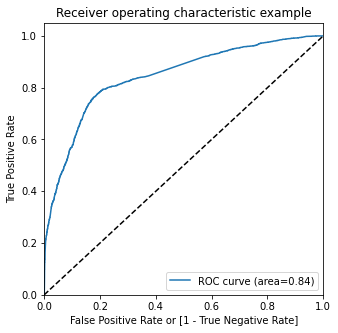

In [170]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding optimal cutoff point

In [171]:
#creating columns with different probability cut-offs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Conversion_Prob'].map(lambda x:1 if x>i else 0)

In [172]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Serial No.,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.984247,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.037739,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.884443,1951,1,1,1,1,1,1,1,1,1,1,0
3,1,0.638343,1553,1,1,1,1,1,1,1,1,0,0,0
4,0,0.187375,9170,0,1,1,0,0,0,0,0,0,0,0


In [173]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.448054  0.991432  0.108391
0.2   0.2  0.731011  0.837209  0.664626
0.3   0.3  0.793942  0.784170  0.800051
0.4   0.4  0.800063  0.732354  0.842387
0.5   0.5  0.788293  0.644227  0.878347
0.6   0.6  0.771186  0.546308  0.911757
0.7   0.7  0.752197  0.441044  0.946697
0.8   0.8  0.728970  0.335373  0.975006
0.9   0.9  0.700879  0.237046  0.990819


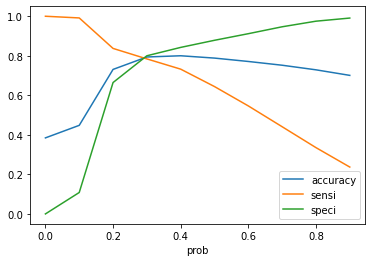

In [174]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**

In [175]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Serial No.,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.984247,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.037739,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.884443,1951,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.638343,1553,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.187375,9170,0,1,1,0,0,0,0,0,0,0,0,0


In [176]:
y_train_pred_final.loc[:5,['Serial No.','Converted','Conversion_Prob','final_predicted']]

,Serial No.,Converted,Conversion_Prob,final_predicted
0,7963,1,0.984247,1
1,5521,0,0.037739,0
2,1951,1,0.884443,1
3,1553,1,0.638343,1
4,9170,0,0.187375,0
5,5097,0,0.187375,0


In [177]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939422473320779

In [178]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  784],
       [ 529, 1922]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of the logistic regression model
TP / float(TP+FN)

0.7841697266421869

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.8000510073960724

In [182]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19994899260392757


In [183]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7102734663710274


In [184]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8557010365521004


### Final Observations on training data:

    - Accuracy: 79.39%
    - Sensitivity: 78.41%
    - Specificity: 80.00%

### Precision and Recall

In [185]:
#looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3137,  784],
       [ 529, 1922]], dtype=int64)

**Precision**
- TP/(TP+FP)

In [186]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7102734663710274

**Recall**
- TP/(TP+FN)

In [187]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7841697266421869

In [188]:
# using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [189]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7102734663710274

In [190]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7841697266421869

### Precision and Recall trade off

In [191]:
from sklearn.metrics import precision_recall_curve

In [192]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    0
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    0
 6370    0
 6371    1
 Name: final_predicted, Length: 6372, dtype: int64)

In [193]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

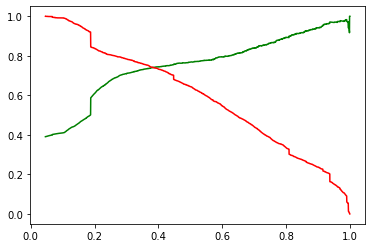

In [194]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [195]:
#standardisation of the variables that are on a different scale
X_test[['TotalVisits',
        'Page Views Per Visit',
        'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits',
                                                                   'Page Views Per Visit',
                                                                   'Total Time Spent on Website']])

In [196]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Working Professional
3497,0,-0.890832,0,0,0,0,1,0,0,0,0,0
4044,0,-0.890832,0,0,1,0,0,0,0,0,0,0
7200,0,-0.617119,0,1,0,0,0,0,0,1,0,0
1183,0,-0.890832,0,0,1,0,0,0,0,1,0,0
8216,0,-0.826966,0,1,0,0,0,0,0,1,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

**Making predictions on the test set**

In [198]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3497    0.937184
4044    0.447627
7200    0.131483
1183    0.187375
8216    0.107482
8746    0.187375
9047    0.082524
6526    0.497955
7694    0.187375
8184    0.720756
dtype: float64

**Creating a dataframe with the actual Converted flag and predicted probabilities**

In [199]:
#converting y_pred to a dataframe which now is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [200]:
y_pred_1.head()

,0
3497,0.937184
4044,0.447627
7200,0.131483
1183,0.187375
8216,0.107482


In [201]:
# converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [202]:
y_test_df.head()

,Converted
3497,1
4044,1
7200,0
1183,0
8216,0


In [203]:
#adding a title to the index
y_test_df['Serial No.'] = y_test_df.index

In [204]:
# removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [206]:
y_pred_final.head()

,Converted,Serial No.,0
0,1,3497,0.937184
1,1,4044,0.447627
2,0,7200,0.131483
3,0,1183,0.187375
4,0,8216,0.107482


In [207]:
# renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})

In [208]:
# rearranging the columns
y_pred_final = y_pred_final.reindex(['Serial No.','Converted','Conversion_Prob'],axis=1)

In [209]:
# Looking at the head of y_pred_final
y_pred_final.head()

,Serial No.,Converted,Conversion_Prob
0,3497,1,0.937184
1,4044,1,0.447627
2,7200,0,0.131483
3,1183,0,0.187375
4,8216,0,0.107482


**Creating a 'Lead Score' column based on the 'Conversion_Prob' values**

In [210]:
y_pred_final['Lead_Score'] = round(y_pred_final['Conversion_Prob']*100).astype(int)

In [211]:
y_pred_final.head()

,Serial No.,Converted,Conversion_Prob,Lead_Score
0,3497,1,0.937184,94
1,4044,1,0.447627,45
2,7200,0,0.131483,13
3,1183,0,0.187375,19
4,8216,0,0.107482,11


**Creating a new column 'Predicted' with 1 if Churn > 0.3 else 0.**

In [212]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.3 else 0)

In [213]:
y_pred_final.head()

,Serial No.,Converted,Conversion_Prob,Lead_Score,final_predicted
0,3497,1,0.937184,94,1
1,4044,1,0.447627,45,1
2,7200,0,0.131483,13,0
3,1183,0,0.187375,19,0
4,8216,0,0.107482,11,0


In [214]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7909190772610766

In [215]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1403,  327],
       [ 244,  757]], dtype=int64)

In [216]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [217]:
# Let's see the sensitivity of our logistic regression model on test data
TP / float(TP+FN)

0.7562437562437563

In [218]:
# Let us calculate specificity
TN / float(TN+FP)

0.8109826589595376

### Final Observation

**Train Data**
   - Accuracy: 79.39%
   - Sensitivity:78.41%
   - Specificity:80.00%
       
**Test Data**
   - Accuracy: 79.10%
   - Sensitivity: 75.62%
   - Specificity: 81.10%
  
  The model seems to predict the conversion rate very well and hence this model should be able to give the CEO confidence in making a good decision.

**Now that a model with high score is created, it can be used again on the entire dataset to predict the lead score of all the leads.**

The dataset before splitting into train and test sets can be used as such.

In [219]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [220]:
#the columns that are on a different scale needs to be normalized before further analysis

X[['TotalVisits',
   'Page Views Per Visit',
   'Total Time Spent on Website']] = scaler.transform(X[['TotalVisits',
                                                         'Page Views Per Visit',
                                                         'Total Time Spent on Website']])

In [221]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,-1.114640,-0.890832,-1.146497,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.615384,0.339054,0.070346,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,-0.422631,1.904695,-0.173022,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,-0.768635,-0.334282,-0.659760,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,-0.422631,1.714920,-0.659760,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [222]:
#picking only those columns that were predicted by latest model to be the top contributors to the conversion
X = X[col]

In [223]:
X.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Working Professional
0,0,-0.890832,0,0,1,0,0,0,0,1,0,0
1,0,0.339054,0,0,0,1,0,0,0,1,0,0
2,0,1.904695,1,0,0,0,0,0,0,0,0,0
3,0,-0.334282,1,0,0,0,0,0,0,0,0,0
4,0,1.714920,1,1,0,0,0,0,0,1,0,0


In [224]:
X_sm = sm.add_constant(X)

In [225]:
#calculating the predicted values
y_pred = res.predict(X_sm)
y_pred[:10]

0    0.187375
1    0.315381
2    0.712977
3    0.177776
4    0.439052
5    0.187375
6    0.807478
7    0.187375
8    0.119510
9    0.307025
dtype: float64

**Creating a dataframe with the actual Converted flag and predicted probabilities**

In [226]:
#converting the values into a dataframe
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0.187375
1,0.315381
2,0.712977
3,0.177776
4,0.439052


In [227]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [228]:
lead_num = df['Lead Number'].values.reshape(-1)
lead_num

array(['660737', '660728', '660727', ..., '579545', '579538', '579533'],
      dtype=object)

In [229]:
#converting y actual values into a dataframe
y = pd.DataFrame({'Lead Number':lead_num, 'Converted':y})
y.head()

,Lead Number,Converted
0,660737,0
1,660728,0
2,660727,1
3,660719,0
4,660681,1


In [230]:
#removing index for both dataframes to append them side by side
y_pred.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [231]:
#appending the two dataframes
y_final = pd.concat([y,y_pred],axis=1)

In [232]:
y_final.head()

,Lead Number,Converted,0
0,660737,0,0.187375
1,660728,0,0.315381
2,660727,1,0.712977
3,660719,0,0.177776
4,660681,1,0.439052


In [233]:
#renaming the last column
y_final = y_final.rename(columns={0:'Conversion_Prob'})

In [234]:
y_final.head()

,Lead Number,Converted,Conversion_Prob
0,660737,0,0.187375
1,660728,0,0.315381
2,660727,1,0.712977
3,660719,0,0.177776
4,660681,1,0.439052


**Creating a 'Lead Score' column using the 'Conversion_Prob' values**

In [235]:
y_final['Lead_Score'] = round(y_final['Conversion_Prob']*100).astype(int)

**Creating a new column 'Predicted' with 1 if Churn > 0.3 else 0.**

In [236]:
y_final['Final_Pred'] = y_final['Conversion_Prob'].map(lambda x:1 if x>0.3 else 0)

In [237]:
y_final.head()

,Lead Number,Converted,Conversion_Prob,Lead_Score,Final_Pred
0,660737,0,0.187375,19,0
1,660728,0,0.315381,32,1
2,660727,1,0.712977,71,1
3,660719,0,0.177776,18,0
4,660681,1,0.439052,44,1


In [238]:
#checking the accuracy score for sanity
metrics.accuracy_score(y_final.Converted, y_final.Final_Pred)

0.7930352631000769

**Looking at the final model again to determine the variables that significantly affect the outcome**

In [239]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.2
Date:                Mon, 17 May 2021   Deviance:                       5924.3
Time:                        17:56:48   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2670      0.135     -1.979      0.048      -0.532      -0.003
Do Not Email                                            -1.1599      0.154     -7.517      0.000      -1.462      -0.857
Total Time Spent on Website                              1.0904      0.038     28.853      0.000       1.016       1.164
Lead Origin_Landing Page Submission                     -0.9000      0.122     -7.348      0.000      -1.140      -0.660
Lead Source_Google                                       0.3089      0.085      3.621      0.000       0.142       0.476
Lead Source_Olark Chat                                   1.0281      0.132      7.791      0.000       0.769       1.287
Lead Source_Organic Search                               0.3791      0.111      3.428      0.001       0.162       0.596
Lead Source_Reference                                    3.9411      0.244     16.179      0.000       3.464       4.419
Lead Source_Welingak Website                             7.0984      1.014      6.997      0.000       5.110       9.087
Specialization_Hospitality Management                   -0.8572      0.310     -2.764      0.006      -1.465      -0.249
Specialization_Others                                   -1.2569      0.115    -10.931      0.000      -1.482      -1.032
Specialization_Travel and Tourism                       -0.4687      0.228     -2.055      0.040      -0.916      -0.022
What is your current occupation_Working Professional     2.5902      0.183     14.139      0.000       2.231       2.949
========================================================================================================================
"""

**Ranking the variables in the order of highest to lowest values of coefficent**

1. Lead Source_Welingak Wesbite: 7.0984
2. Lead Source_Reference:  3.9411
3. What is your current occupation_Working Professional:  2.5902
4. Total Time Spent on Website:  1.0904
5. Lead Source_Olark Chat:  1.0281
6. Lead Source_Organic Search:  0.3791
7. Lead Source_Google:  0.3089
8. Specialization_Travel and Tourism: - 0.4687
9. Specialization_Hospitality Management: - 0.8572
10. Lead Origin_Landing Page Submission: - 0.9000
11. Do Not Email: - 1.1599
11. Specialization_Others: - 1.2569